- Gini(E) = 1-summation(j=1 to c p^2 * j)

- Entropy(s) = -P(yes)logP(yes) - P(no)logP(no)

- Information Gain = Entropy(s) - [(Weighted Avg * Entropy(each feature)]

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
x = iris.data[:,2:] # petal length and width
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
from sklearn.tree import export_graphviz
# from IPython.display import Image
export_graphviz(tree_clf,out_file = "iris_tree.dot",feature_names = iris.feature_names[2:],
                class_names = iris.target_names,rounded = True,filled = True)
# To output a graph definition file called iris_tree.dot

C:\Users\IIIT-rgukt\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


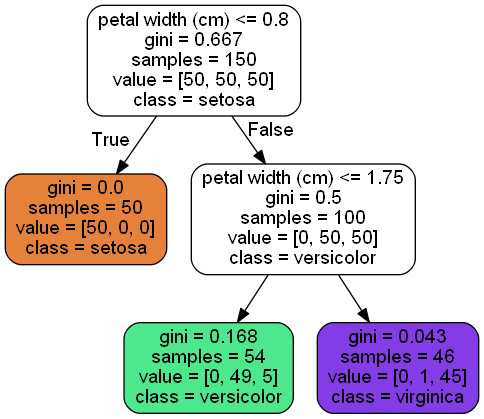

In [6]:
import os
os.environ["PATH"]+=os.environ['PATH']+';'+r'C:\Users\IIIT-rgukt\Anaconda3\Library\bin\graphviz-2.38\release\bin'
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf,out_file = dot_data,filled = True,rounded = True,feature_names = iris.feature_names[2:],class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [7]:
tree_clf.predict_proba([[3,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5,1.5]]) # it wil output the class Iris-Versicolor (classes)

array([1])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 5)

In [30]:
y_pred = tree_clf.predict(x_test)

In [31]:
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,2:]
y = iris.target
des_tr_reg = DecisionTreeRegressor(max_depth = 2)
des_tr_reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

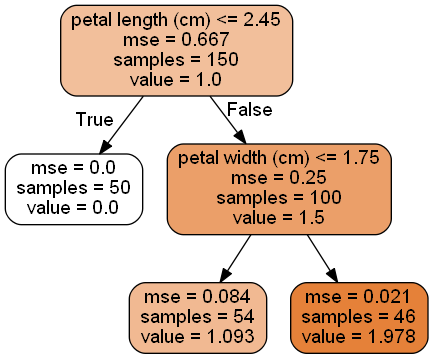

In [34]:
import os
os.environ["PATH"]+=os.environ['PATH']+';'+r'C:\Users\IIIT-rgukt\Anaconda3\Library\bin\graphviz-2.38\release\bin'
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(des_tr_reg,out_file = dot_data,filled = True,rounded = True,feature_names = iris.feature_names[2:],class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
des_tr_reg.predict([[5,1.5]])

array([1.09259259])